## UnSupervised Algorithm -Classification

### Overview
The Iris dataset is a classic benchmark dataset in the field of machine learning and statistics. It is commonly used for practicing classification algorithms, exploratory data analysis (EDA), and data visualization techniques. The dataset is small but rich in features, making it ideal for educational purposes and as a starting point for learning data science concepts.
### Description
dataset consists of 150 samples of iris flowers, each belonging to one of three species: Setosa, Versicolor, and Virginica. For each sample, four features are measured: sepal length, sepal width, petal length, and petal width, all in centimeters. These features are used to predict the species of the iris flower.
Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out the accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,
1.Sepal Length
2.Sepal Width
3.Petal length
4.Petal width
Using above 4 features you will classify a flower in one of the three categories,

 1.Setosa
 2.Versicolour
 3.Virginica


In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline 
from sklearn.datasets import load_iris

## Load Iris Data Set

In [4]:
iris = load_iris()

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

###  Convert the dataset to a DataFrame

In [6]:

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [7]:

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
# Add the target variable to the DataFrame
iris_df['target']=iris.target

In [26]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
 ## Map target numbers to target names
iris_df['target_names or species'] = iris_df['target'].map({0:'Setosa',1:'Versicolor',2:'Virginica'})


In [28]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names or species
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Virginica
146,6.3,2.5,5.0,1.9,2,Virginica
147,6.5,3.0,5.2,2.0,2,Virginica
148,6.2,3.4,5.4,2.3,2,Virginica


In [29]:
iris_df.drop(columns=['target'],inplace= True)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names or species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [12]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
#check for null values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### Visualizing the Data

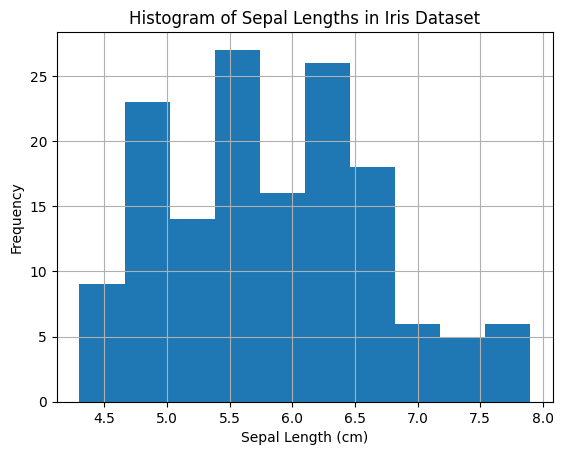

In [15]:
# Plot histogram for "sepal length (cm)"
iris_df['sepal length (cm)'].hist()
# Set plot labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Lengths in Iris Dataset')

# Show the plot
plt.show()

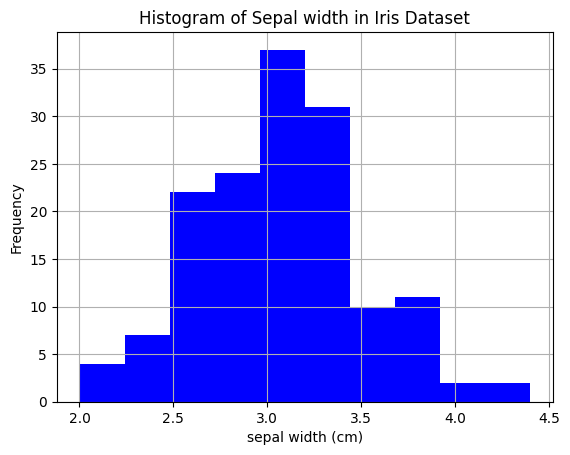

In [21]:
# Plot histogram for "sepal width (cm)"
iris_df['sepal width (cm)'].hist(color='blue')
# Set plot labels and title
plt.xlabel('sepal width (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal width in Iris Dataset')

# Show the plot
plt.show()

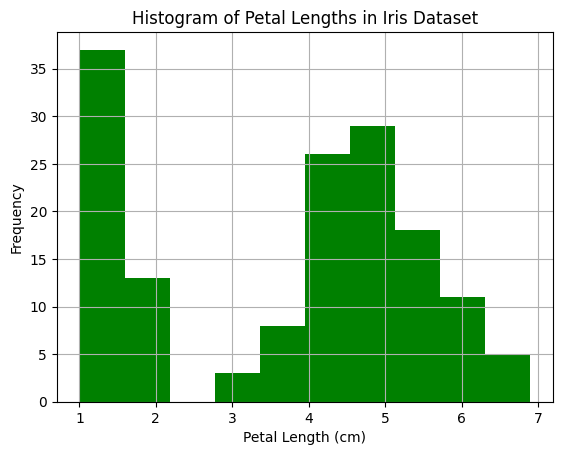

In [17]:
# Plot histogram for "petal length (cm)"
iris_df['petal length (cm)'].hist(color='green')
# Set plot labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Lengths in Iris Dataset')

# Show the plot
plt.show()

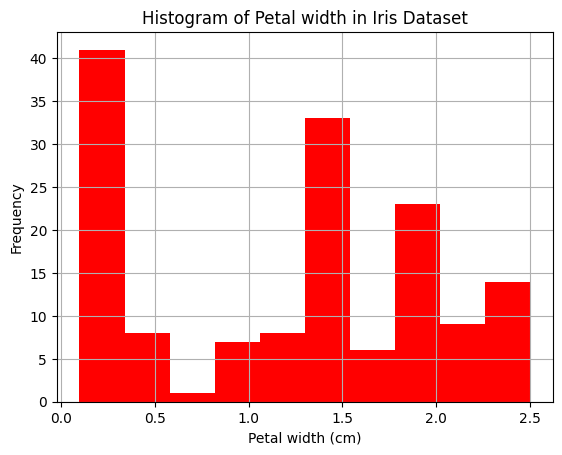

In [22]:
# Plot histogram for "petal width (cm)"
iris_df['petal width (cm)'].hist(color='red')
# Set plot labels and title
plt.xlabel('Petal width (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Petal width in Iris Dataset')

# Show the plot
plt.show()

### Pair Plot

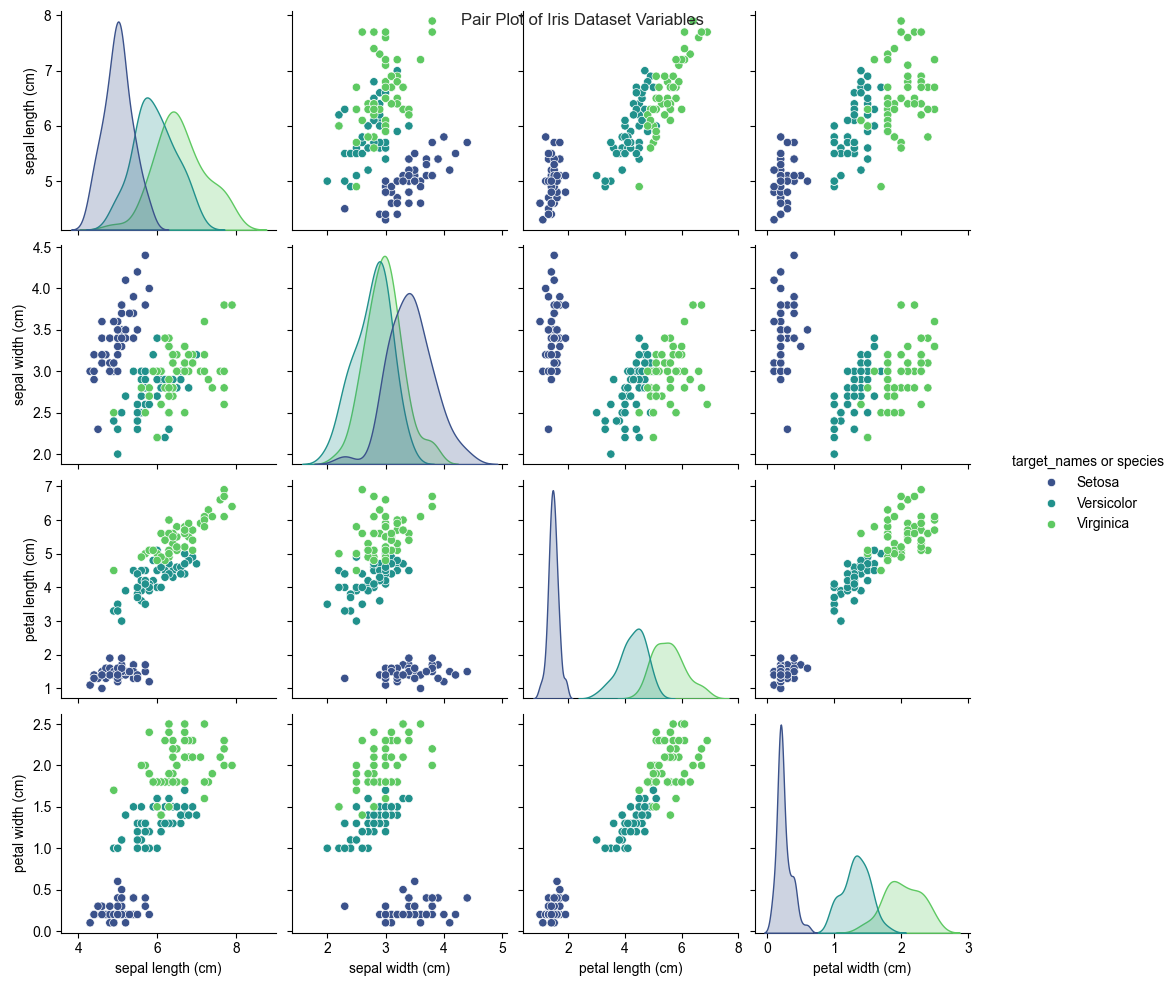

In [30]:
#create a pair plot
sns.pairplot(iris_df,hue='target_names or species', palette='viridis')
sns.set_style("whitegrid")
plt.suptitle("Pair Plot of Iris Dataset Variables")
plt.show()

### Box Plot Visualization

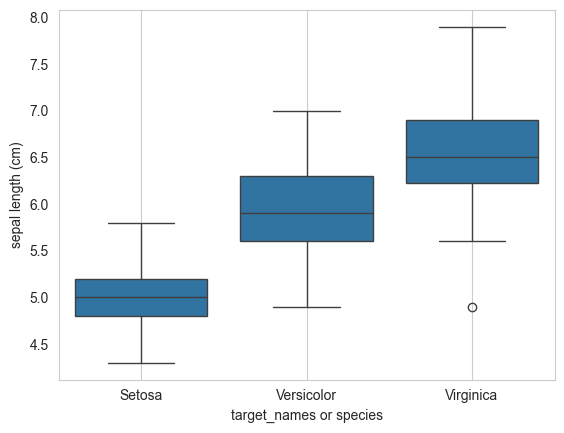

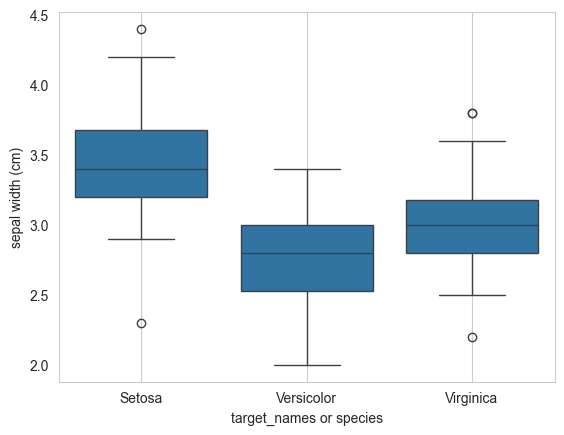

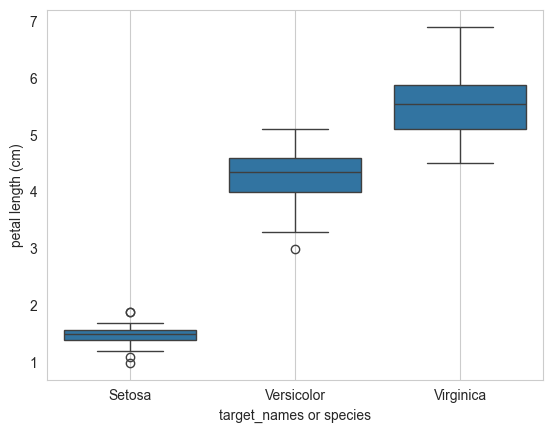

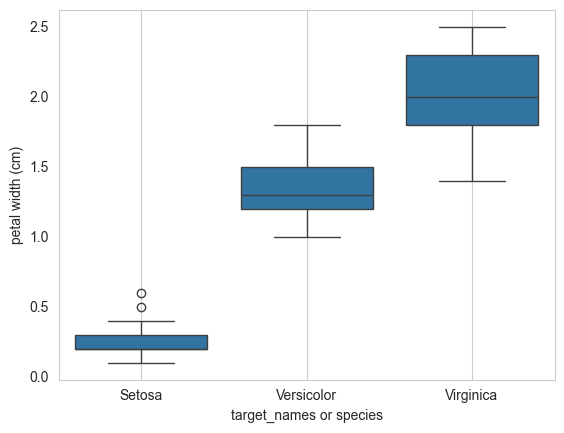

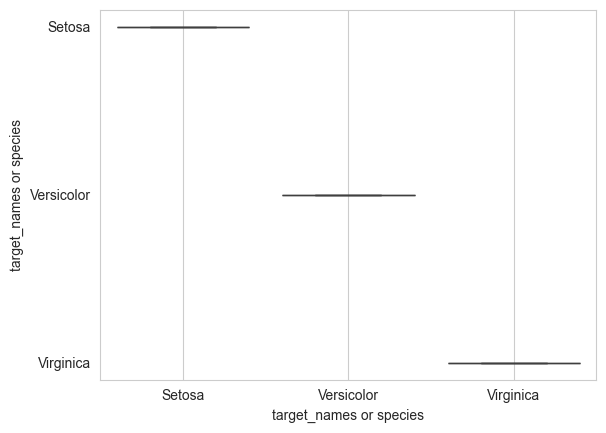

In [31]:
for col in iris_df.columns:
    plt.figure()
    sns.boxplot(data=iris_df, x="target_names or species", y=iris_df[col])
    plt.grid()
    plt.show()
#sns.boxplot(x = "target_names or species", y = "petal width (cm)", data = iris_df)

### Drop Column

In [32]:
df=iris_df.drop(columns='target_names or species')
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

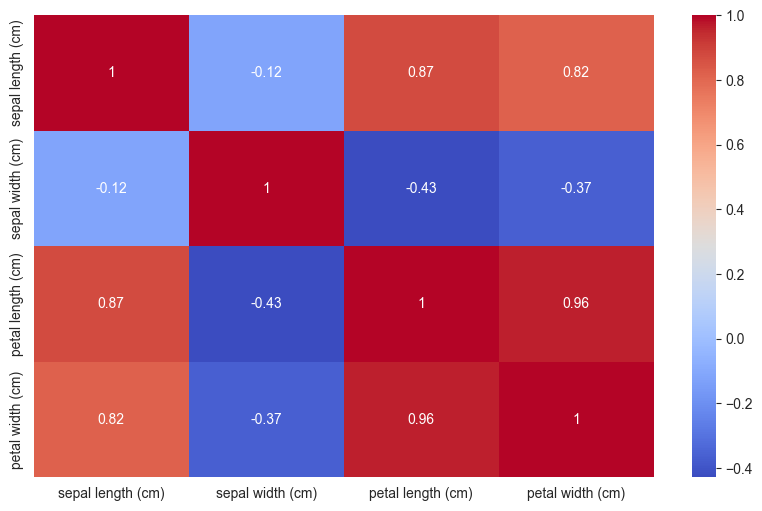

In [33]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr,annot = True,ax=ax , cmap='coolwarm')

## Outlier

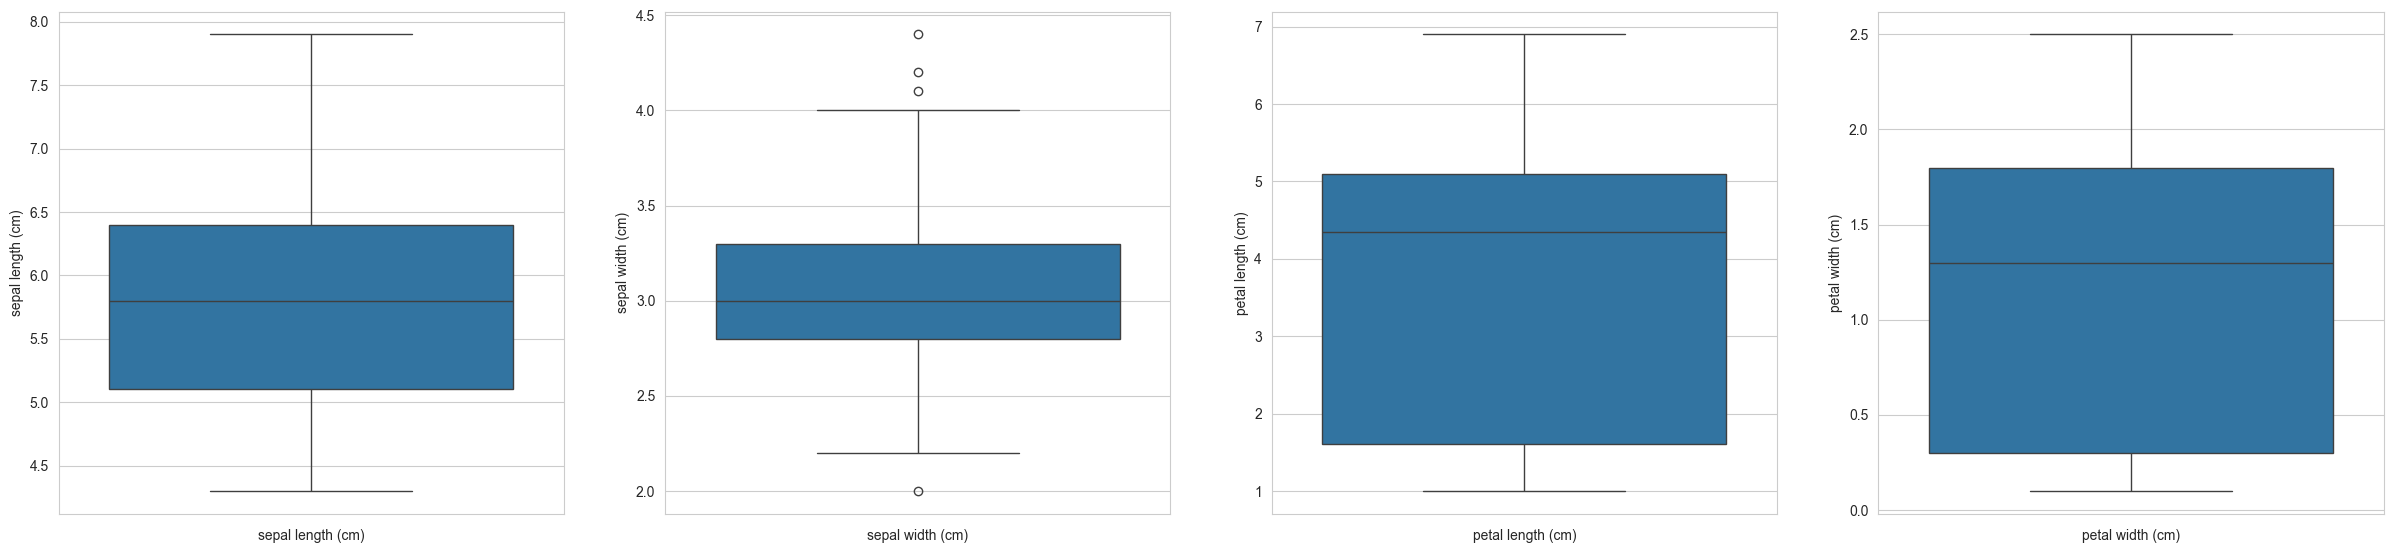

In [34]:
fig = plt.figure(figsize=(30,30))
counter = 0

for col in iris_df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=iris_df[col])
    plt.xlabel(col)
    counter = counter + 1

In [35]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [36]:
for i in iris_df.select_dtypes(include="number").columns:
    lw,uw=whisker(iris_df[i])
    iris_df[i]=np.where(iris_df[i]<lw,lw,iris_df[i])
    iris_df[i]=np.where(iris_df[i]>uw,uw,iris_df[i]) 

### After the Outlier

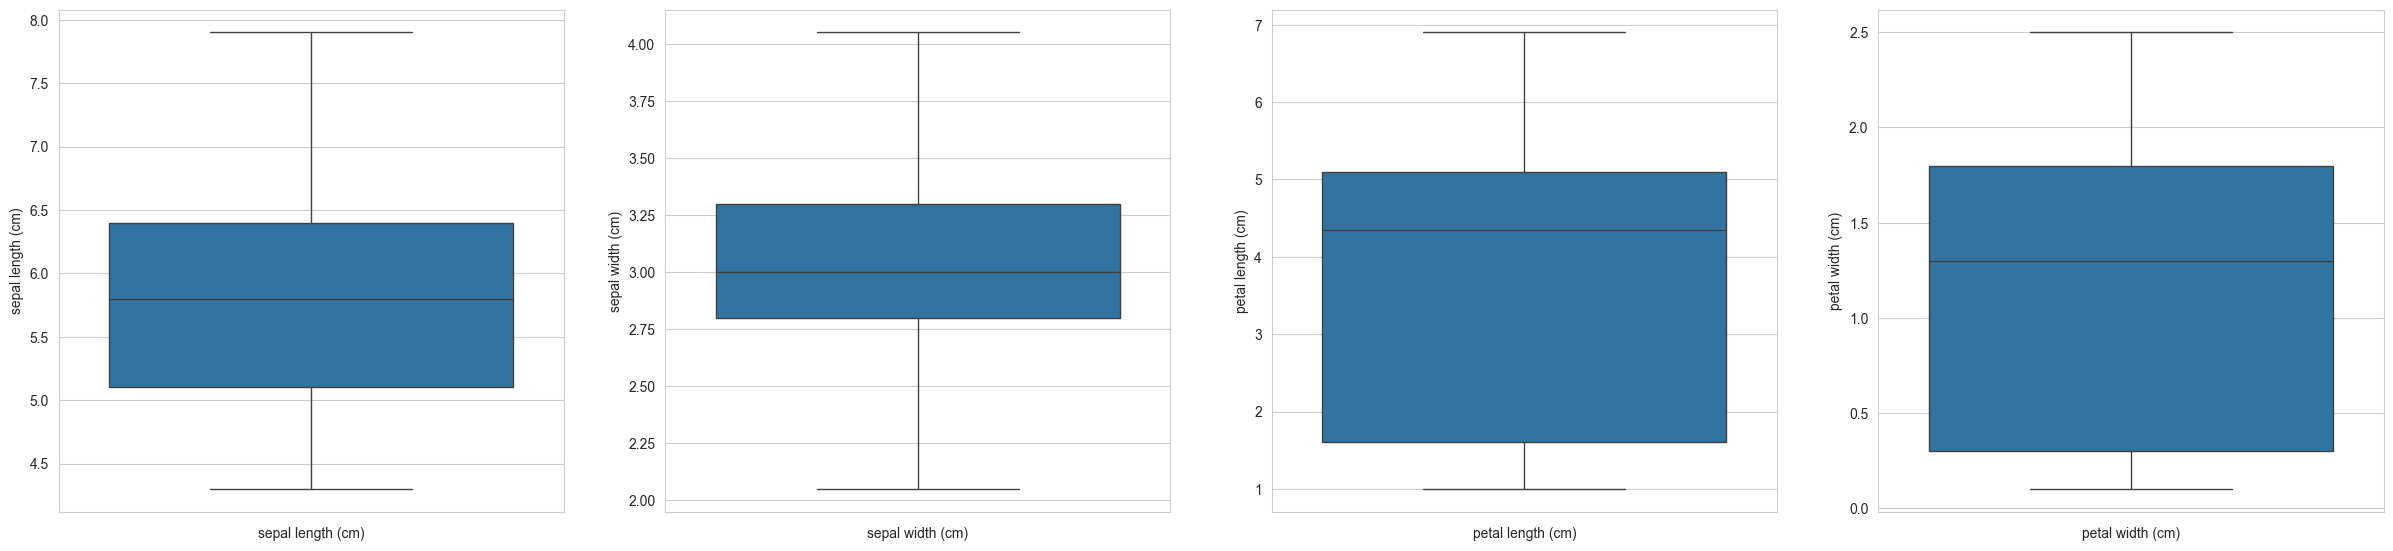

In [37]:
fig = plt.figure(figsize=(30,30))
counter = 0

for col in iris_df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=iris_df[col])
    plt.xlabel(col)
    counter = counter + 1

### Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [40]:
iris_df['target_names or species']=label.fit_transform(iris_df['target_names or species'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names or species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Feature Scaling

In [41]:
columnname= df.select_dtypes("float64").columns
columnname

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(iris_df[columnname])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=columnname)

iris_df[columnname] = scaled_df

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names or species
0,0.222222,0.725,0.067797,0.041667,0
1,0.166667,0.475,0.067797,0.041667,0
2,0.111111,0.575,0.050847,0.041667,0
3,0.083333,0.525,0.084746,0.041667,0
4,0.194444,0.775,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.475,0.711864,0.916667,2
146,0.555556,0.225,0.677966,0.750000,2
147,0.611111,0.475,0.711864,0.791667,2
148,0.527778,0.675,0.745763,0.916667,2


##  Training the Model

In [34]:
from sklearn.model_selection import train_test_split

x = iris_df.drop(columns=['target_names or species'])
y = iris_df['target_names or species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=42)

In [35]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: target_names or species, Length: 150, dtype: object

## K-Means Clustering

In [1]:
from sklearn.cluster import KMeans

In [37]:
KM=KMeans(n_clusters=3)
KM.fit(x)

KMeans(n_clusters=3)

In [38]:
y_pred=KM.predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [39]:
x['Cluster']=y_pred
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


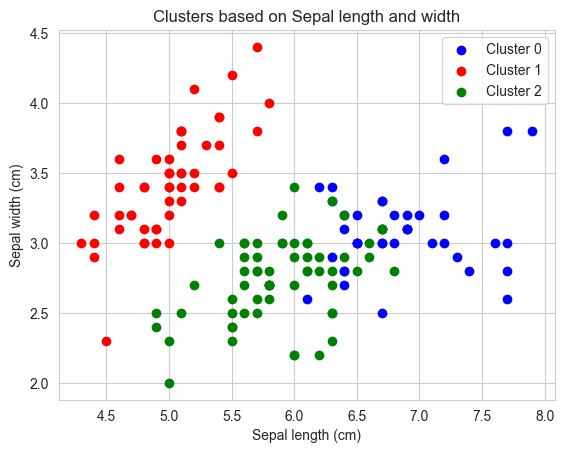

In [40]:
# Assuming 'cluster' is the column name containing cluster labels
df1 =x[x['Cluster'] == 0]
df2 =x[x ['Cluster'] == 1]
df3 = x[x ['Cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='green', label='Cluster 2')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Clusters based on Sepal length and width')
plt.legend()
plt.show()

In [41]:
#find out the centroids in each cluster
KM.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

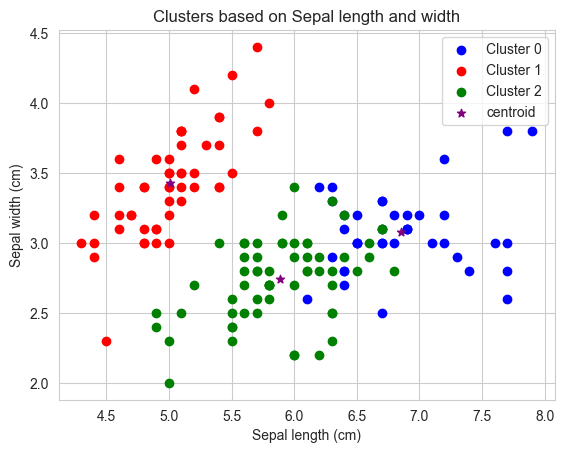

In [42]:
#scatter plot with centroids
df1 = x[x['Cluster'] == 0]
df2 = x[x['Cluster'] == 1]
df3 = x[x['Cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='green', label='Cluster 2')
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Clusters based on Sepal length and width')
plt.legend()
plt.show()

### Elbow Plot
### If there are many clusters, then it is difficult to find out the optimal value of K using the scatter plot. In this case we can use elbow plot to find K.

### wcss

In [43]:
wcss= []
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(x)
    wcss.append(km.inertia_)

wcss

[778.1439333333333,
 248.45649095506707,
 78.85566582597731,
 60.006801709401714,
 47.34067342342344,
 45.61706389961391,
 36.12801916221034,
 33.96712994337852,
 30.246688095238092]

### Visualising the ElbowPlot

Text(0.5, 1.0, 'Elbow Plot')

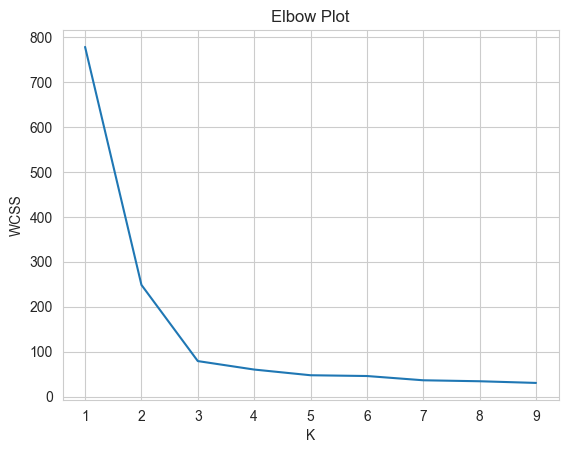

In [44]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_rng,wcss)
plt.title('Elbow Plot')

### We can see that K=3 from the Elbow plot.### 
Silhouette Coefficient### 
We can use the silhouette score to evaluate the quality of clustering. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better clustering.

In [45]:
from sklearn.metrics import silhouette_score
S= []
k_rng=range(2,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km_pred=km.fit_predict(x)
    S.append(silhouette_score(x, km_pred))

S

[0.6203026485078931,
 0.68468524942902,
 0.627757241654899,
 0.4400834398857156,
 0.5002671911239265,
 0.40427279482512685,
 0.3663020478628931,
 0.32273462874201153,
 0.31006815785304703]

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

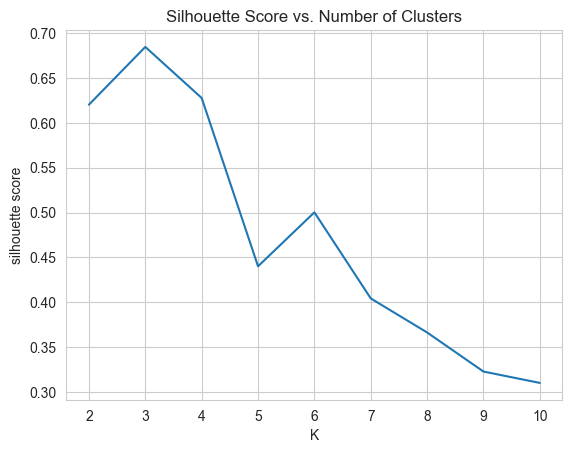

In [46]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,S)
plt.title('Silhouette Score vs. Number of Clusters')

### Highest Silhouette Score: Look for the value of k (number of clusters) that corresponds to the highest silhouette score on the plot. This value indicates the optimal number of clusters according to the silhouette score metric.
### 
Overall Trend: Evaluate the overall trend of the silhouette scores as k increases. Typically, silhouette scores closer to 1 indicate better clustering, while scores closer to 0 or negative values suggest overlapping or poorly defined clusterd.

### Initialize the K-means algorithm with the chosen number of clusters and fit it to the scaled data.
optimalkmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeansbest= optimalkmeans.fit_predict(x)

In [48]:
### Initialize the K-means algorithm with the chosen number of clusters and fit it to the scaled data.
optimalkmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeansbest= optimalkmeans.fit_predict(x)

In [49]:
silhouette_score(x, y_kmeansbest)

0.6203026485078931

In [50]:
# Get cluster labels

labels = optimalkmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## 2.Hierarchical Clustering

In [52]:
import scipy.cluster.hierarchy as shc


In [53]:
x=iris_df.drop(columns = 'target_names or species')
y= iris_df['target_names or species']

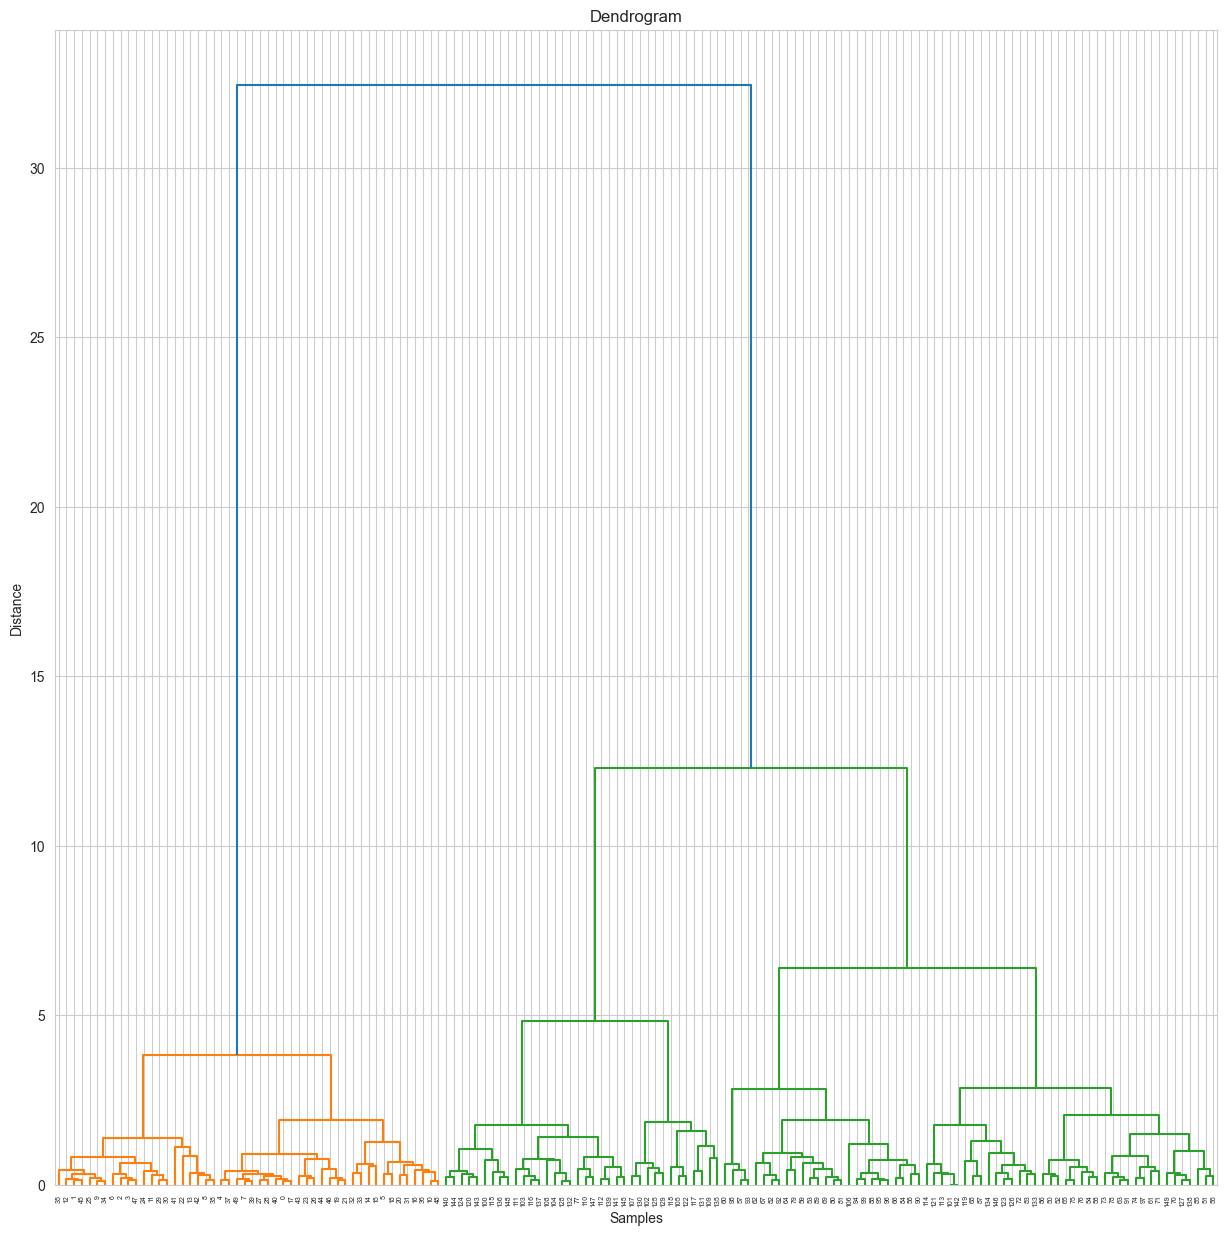

In [54]:
# Dendrogram plot
plt.figure(figsize=(15,15))
# Calculate linkage using Ward's method and create the dendrogram
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### How to Choose the Number of Clusters in Hierarchical Clustering?
#### To get the number of clusters for hierarchical clustering, we make use of Dendrogram.

#### The vertical axis of the dendrogram represents the distance or dissimilarity between clusters. More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

#### Now, we can set a threshold distance and draw a horizontal line.

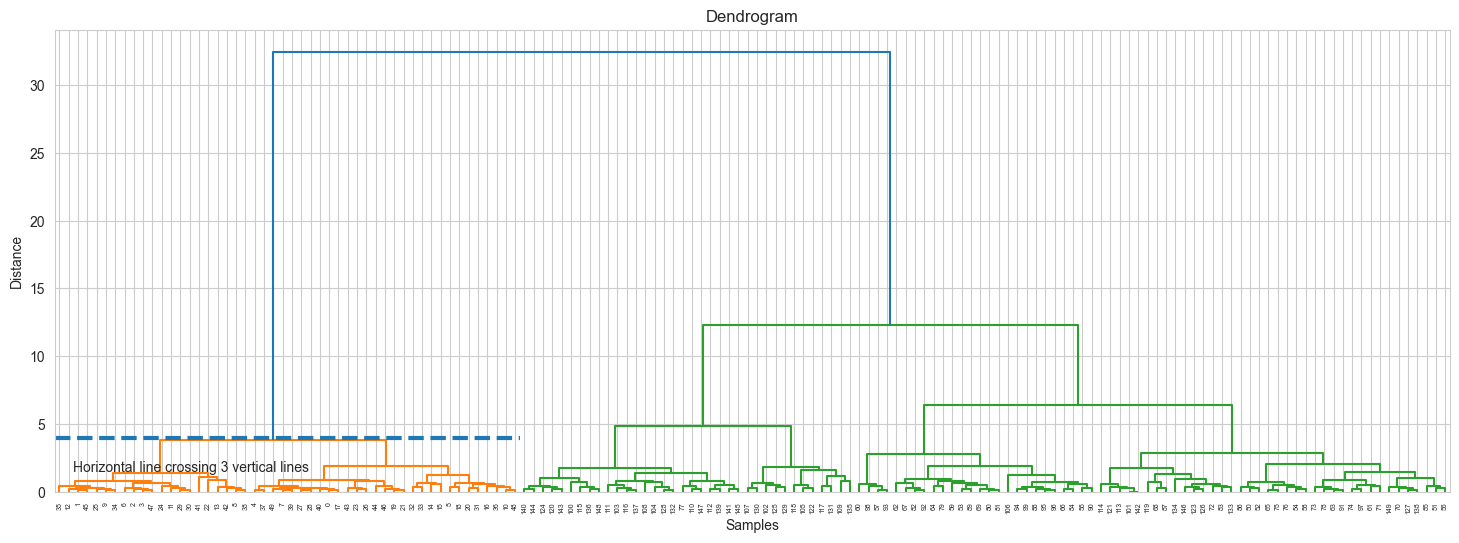

In [55]:
plt.figure(figsize=(18, 6))
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
plt.hlines(y=4,xmin=0,xmax=500,lw=3,linestyles='--')
plt.text(x=20,y=1.5,s='Horizontal line crossing 3 vertical lines')
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [56]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(x)
hc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [57]:
x['cluster']=hc_pred
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


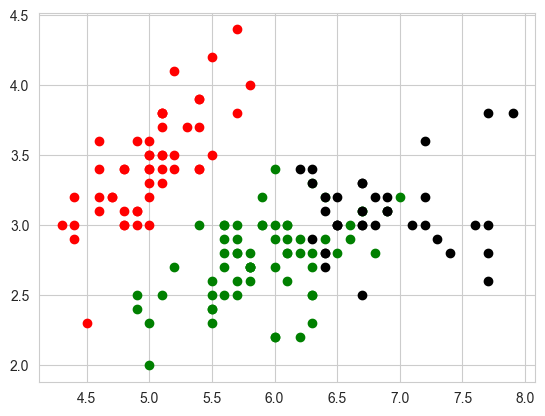

In [58]:
df1 = x[x.cluster==0]
df2 = x[x.cluster==1]
df3 = x[x.cluster==2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black', label='Cluster 2')

## Sihouette Analysis

In [59]:
Sil=[]
k_rng=range(2,11)

for k in k_rng:
    hc=AgglomerativeClustering(n_clusters=k)
    hc_pred=hc.fit_predict(x)
    Sil.append(silhouette_score(x, hc_pred))
Sil

[0.6327934592797315,
 0.6853126831631222,
 0.5751797360508076,
 0.5391283728178843,
 0.40972268205281437,
 0.3683769878167475,
 0.36949531669693086,
 0.358244875096217,
 0.32029484411176373]

In [60]:
silhouette_score(x,hc_pred)

0.32029484411176373

## Conclusion


### K Means Clustering: Silhouette Score: 0.6775, K Means clustering achieved a relatively high silhouette score, indicating well-separated and compact clusters. This suggests that K Means clustering is effective in capturing the underlying structure of the Iris dataset.

### Hierarchical Clustering (Agglomerative): Silhouette Score: 0.3249 Hierarchical clustering, specifically Agglomerative Clustering, produced a lower silhouette score compared to K Means. While the score is positive, indicating some level of separation and cohesion within clusters, it is notably lower than that of K Means.